## Import Libararies

In [249]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

## Data Collection And Statical Analysis 

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">Column Name</th>
      <th style="background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">sepal_length</td>
      <td style="font-size: 14px; text-align: left;">Length of the sepal in (cm)</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">sepal_width</td>
      <td style="font-size: 14px; text-align: left;">Width of the sepal in (cm)</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">petal_length</td>
      <td style="font-size: 14px; text-align: left;">Length of the petal in (cm)</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">petal_width</td>
      <td style="font-size: 14px; text-align: left;">Width of the petal in (cm)</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">species</td>
      <td style="font-size: 14px; text-align: left;">Species name</td>
    </tr>
  </tbody>
</table>

In [250]:
#import the dataset
df= pd.read_csv("IRIS.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


-Showing dataset and some Visualization

In [251]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [252]:
df.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [253]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Cleaning <a id='data-cleaning'>

In [254]:
#check for null values 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [255]:
#Duplicate handling
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3, 5)


In [256]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [257]:
#search for the unique values in every column
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

sepal_length: 35 distinct values
sepal_width: 23 distinct values
petal_length: 43 distinct values
petal_width: 22 distinct values
species: 3 distinct values


In [258]:
print(X)
print(Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


## Data visualization

**Univariate Exploration**

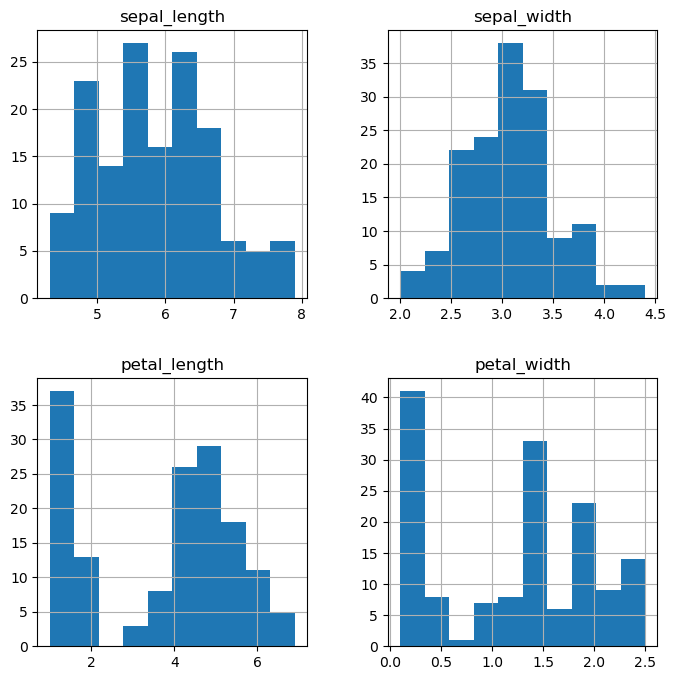

In [259]:
#Dataset histogram
df.hist(figsize = (8,8))
plt.show()

<Figure size 1200x800 with 0 Axes>

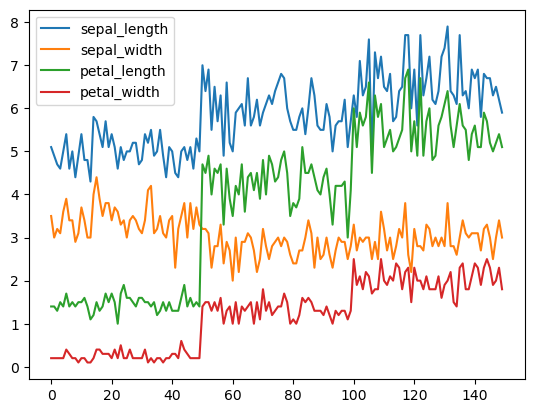

In [260]:
plt.figure(figsize=(12,8))
df.plot()
plt.show()

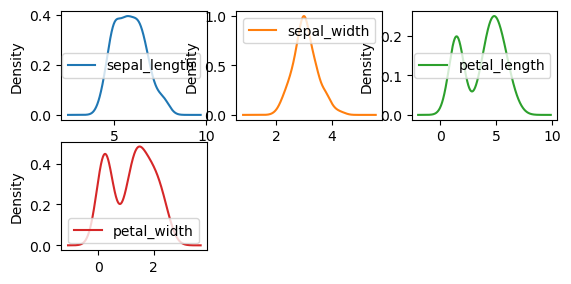

In [261]:
#Dataset plot
df.plot(kind="density", subplots=True, layout=(3,3), sharex=False)
plt.show()

**Bivariate Exploration**

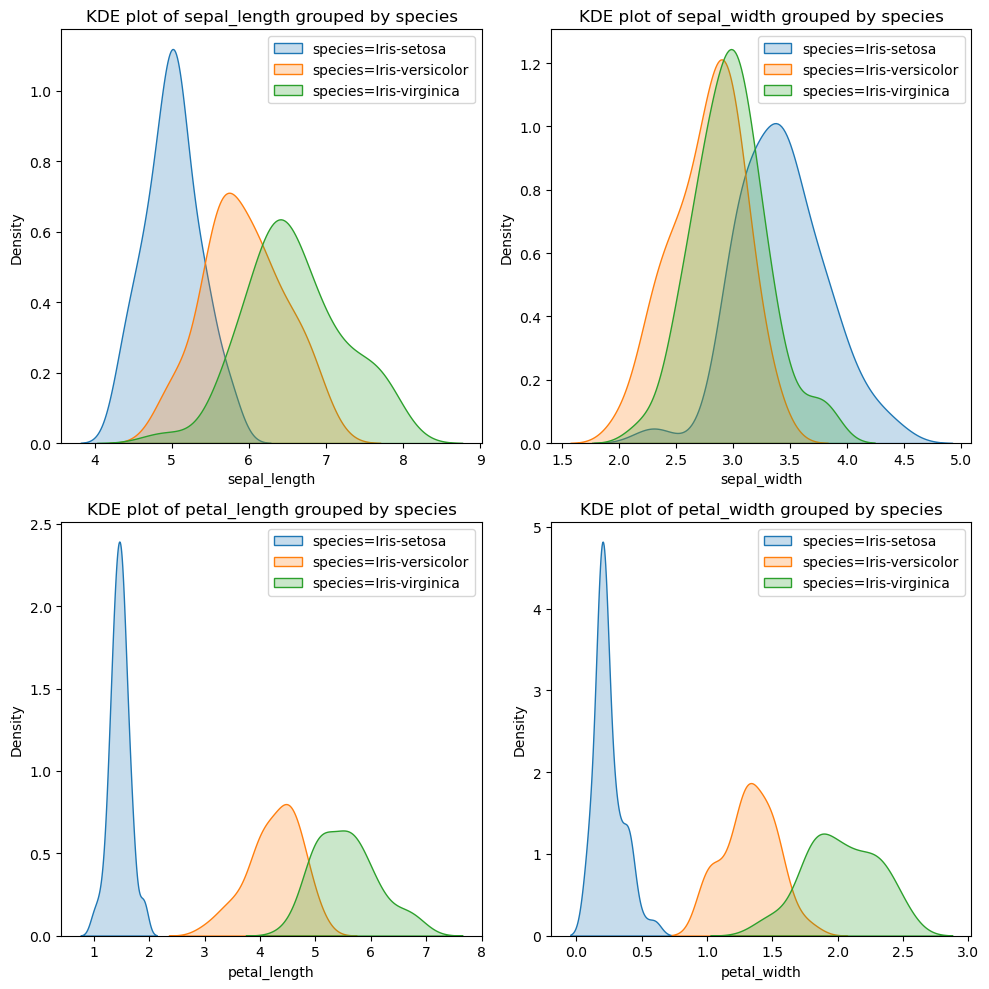

In [262]:
#plot for each variable grouped by the Outcome
num_columns = len(df.columns.drop('species'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('species')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['species']=='Iris-setosa'][column], label='species=Iris-setosa', fill=True)
    sns.kdeplot(data=df[df['species']=='Iris-versicolor'][column], label='species=Iris-versicolor', fill=True)
    sns.kdeplot(data=df[df['species']=='Iris-virginica'][column], label='species=Iris-virginica', fill=True)
    plt.title(f'KDE plot of {column} grouped by species')
    plt.legend()

plt.tight_layout()
plt.show()

**Multivariate Exploration**

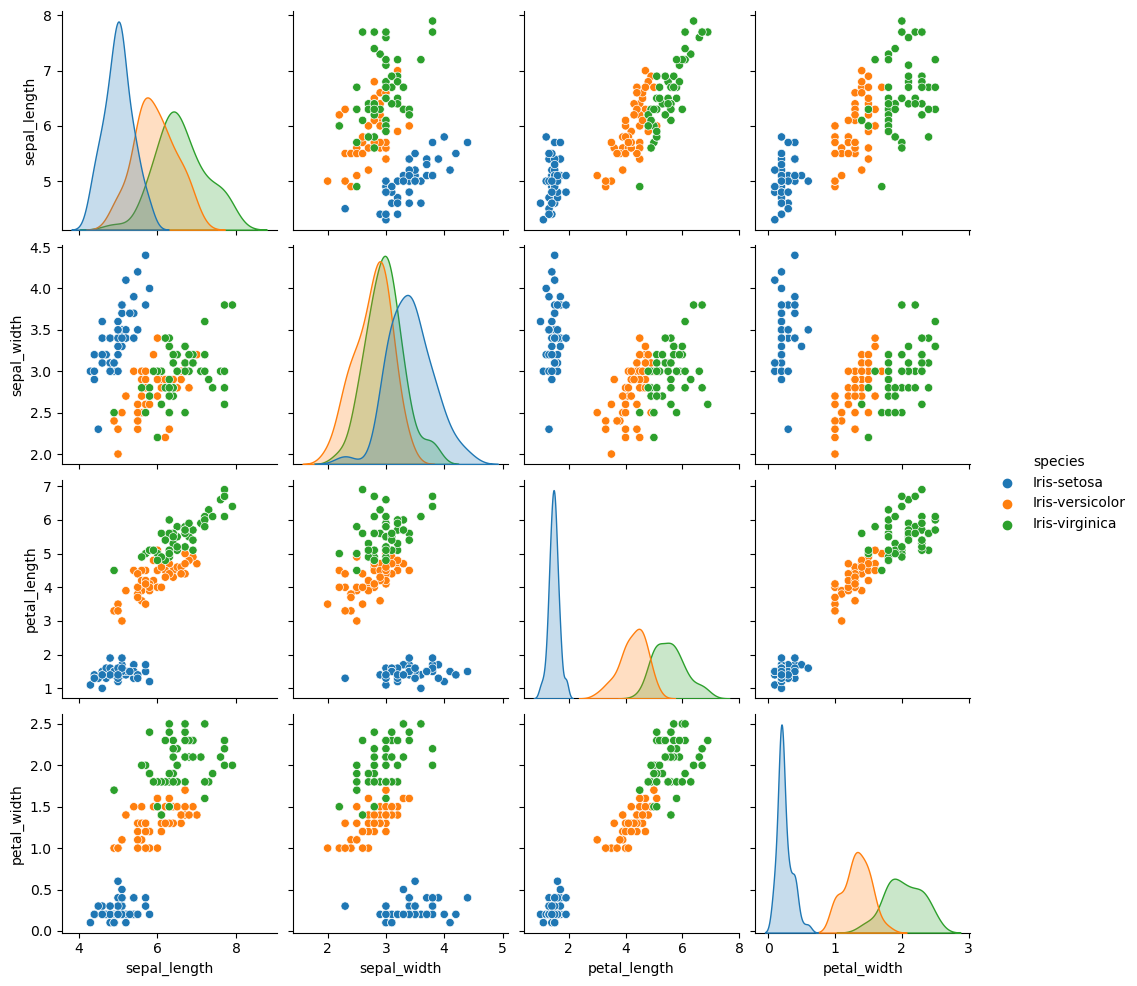

In [263]:
sns.pairplot(df,hue = ("species"))

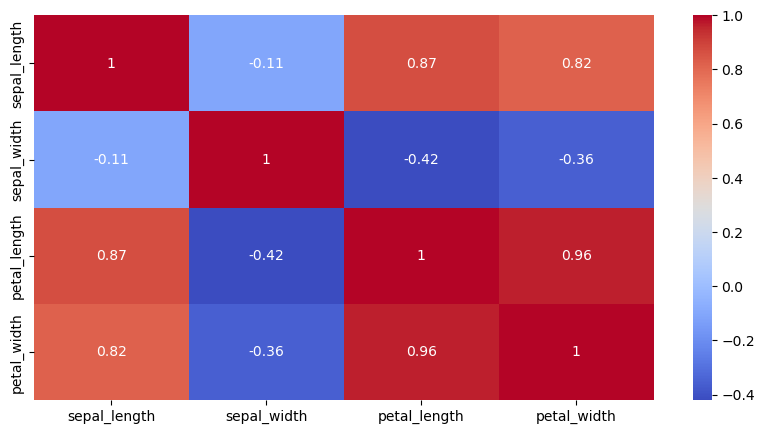

In [264]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

## Data Preprocessing, Encoding

In [265]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [266]:
print(df['species'].unique())

[0 1 2]


In [267]:
#split dataset from Outcome
X = df.drop(columns= 'species', axis=1)
Y = df['species']


In [268]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.30 )

## ML Models

**Logistic Regression**

In [269]:
# LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, Y_train)


LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [270]:
#Function that get the model,input,target and name then calculate accuracy
def accuracy(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    

In [271]:
#calculate accuracy of the training data
train_predictions = accuracy(log_reg, X_train, Y_train, 'Train')

#calculate accuracy of validation data
val_predictions = accuracy(log_reg, X_test, Y_test, 'Validation')

Accuracy: 98.10%
Accuracy: 95.56%


**K-Neighbors-Classifier**

In [272]:
# KNN
KNN_model = KNeighborsClassifier(n_neighbors = 4)
KNN_model.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=4)

In [273]:
#calculate accuracy of the training data
train_predictions = accuracy(KNN_model, X_train, Y_train, 'Train')

#calculate accuracy of validation data
val_predictions = accuracy(KNN_model, X_test, Y_test, 'Validation')

Accuracy: 98.10%
Accuracy: 88.89%


**Decision Tree**

In [274]:
# Create the Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, Y_train)

# Evaluate the model on the training and validation data
train_accuracy = decision_tree_model.score(X_train, Y_train)
val_accuracy = decision_tree_model.score(X_test, Y_test)

# Print the results
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))


Training Accuracy: 100.00%
Validation Accuracy: 91.11%


**Hyperparameter Tuning Of Decision Tree**

In [275]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, Y_train)

# Evaluate the final model on the training and validation data
train_accuracy = best_model.score(X_train, Y_train)
val_accuracy = best_model.score(X_test, Y_test)

# Print the results
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100)) 

Training Accuracy: 98.10%
Validation Accuracy: 86.67%


**SVC (support vector classifier)**

In [276]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')

# Fit the SVM model to the training data
svm_model.fit(X_train, Y_train)

# Make predictions on the training data
y_train_pred = svm_model.predict(X_train)

# Make predictions on the validation data
y_val_pred = svm_model.predict(X_val)

# Calculate the training accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(Y_val, y_val_pred)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))



Training Accuracy: 97.50%
Validation Accuracy: 100.00%


## END